**非線形回帰モデル　実装演習**

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def sin_func(x):
    return np.sin(2 * np.pi * x) 

def add_noise(y_true, var):
    return y_true + np.random.normal(scale=var, size=y_true.shape)

def plt_result(xs, ys_true, ys):
    plt.scatter(xs, ys,facecolor="none", edgecolor="b", s=50,  label="training data")
    plt.plot(xs, ys_true, label="$\sin(2\pi x)$")
    plt.legend()
    
def polynomial_features(xs, degree=3):
    """多項式特徴ベクトルに変換
         X = [[1, x1, x1^2, x1^3],
                 [1, x2, x2^2, x2^3],
                   ...                             
                 [1, xn, xn^2, xn^3]]"""
    X = np.ones((len(xs), degree+1))
    X_t = X.T #(100, 4)
    for i in range(1, degree+1):
        X_t[i] = X_t[i-1] * xs
    return X_t.T

In [4]:
#データの作成
n_sample = 100
var = .300
xs = np.linspace(0, 1, n_sample)
ys_true = sin_func(xs)
ys = add_noise(ys_true, var)

print("xs: {}".format(xs.shape))
print("ys_true: {}".format(ys_true.shape))
print("ys: {}".format(ys.shape))

xs: (100,)
ys_true: (100,)
ys: (100,)


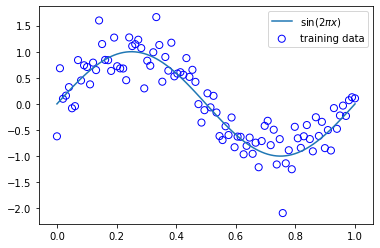

In [5]:
#結果の描画
plt_result(xs, ys_true, ys)

In [16]:
#学習
Phi = polynomial_features(xs,31)
Phi_inv = np.dot(np.linalg.inv(np.dot(Phi.T, Phi)), Phi.T)
w = np.dot(Phi_inv, ys)

#予測
ys_pred = np.dot(Phi, w)

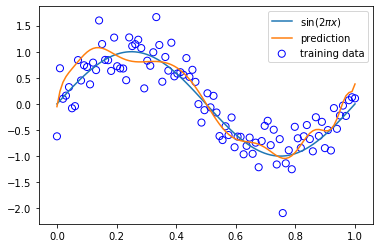

In [17]:
plt.scatter(xs, ys, facecolor="none", edgecolor="b", s=50, label="training data")
plt.plot(xs, ys_true, label="$\sin(2\pi x)$")
plt.plot(xs, ys_pred, label="prediction")
# for i in range(0, 4):
#     plt.plot(xs, Phi[:, i], label="basis")
plt.legend()
plt.show()

サイン関数をもとにしたデータの非線形回帰を行った。  
今回のデータの範囲的には大体３次程度の表現力があれば表現できそうと推察されるが、  
実際にも3~5程度の次数で良好なけっかとなった。  
値を極端に大きくすると過学習の傾向がみられることも確認できた。  